Before we get started, a couple of reminders to keep in mind when using iPython notebooks:

- Remember that you can see from the left side of a code cell when it was last run if there is a number within the brackets.
- When you start a new notebook session, make sure you run all of the cells up to the point where you last left off. Even if the output is still visible from when you ran the cells in your previous session, the kernel starts in a fresh state so you'll need to reload the data, etc. on a new session.
- The previous point is useful to keep in mind if your answers do not match what is expected in the lesson's quizzes. Try reloading the data and run all of the processing steps one by one in order to make sure that you are working with the same variables and data that are at each quiz stage.


## Load Data from CSVs

In [1]:
import unicodecsv

## Representing a CSV:
## Option 1: Each row is a list, set is a list of lists 
## csv = [['a1','a2','a3'],
##        ['b2','b3','b4']]
## Option 2: Each row is a dictionary, works well if csv has a header because keys can be column names


enrollments = [] # create list of enrollments
f = open('enrollments.csv', 'rb') # open file; mode rb file opened for reading, b flag change way its read
reader = unicodecsv.DictReader(f) # use dictreader because file has headers; returns iterator - for loop can access 1 at a time
for row in reader:
    enrollments.append(row) #appends each row to a list because you want to access multiple times
f.close()

## This code reads through csv and returns rows as key/value pairings(dictionary) and adds dictionary entries into list

enrollments[0]


#with open('enrollments.csv', 'rb') as f: #to avoid having to close the file, you can you with statement 
#    reader = unicodecsv.DictReader(f)
#    enrollments = list(reader)

{'account_key': '448',
 'cancel_date': '2015-01-14',
 'days_to_cancel': '65',
 'is_canceled': 'True',
 'is_udacity': 'True',
 'join_date': '2014-11-10',
 'status': 'canceled'}

In [2]:
#with open('enrollments.csv', 'rb') as e:
#    reader = unicodecsv.DictReader(e)
#    enrollments = list(reader)

#with open('daily_engagement.csv', 'rb') as e:
#    reader = unicodecsv.DictReader(e)
#    daily_engagement = list(reader)
    
#with open('project_submissions.csv','rb') as s:
#    reader = unicodecsv.DictReader(s)
#    project_submissions = list(reader)


def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)
## have the function return a list, then set the list to a variable when the list is called
    
enrollments = read_csv('enrollments.csv')
daily_engagement = read_csv('daily_engagement.csv')
project_submissions = read_csv('project_submissions.csv')

print('Enrollments')
print(enrollments[0])
print()
print('Daily Engagement')
print(daily_engagement[0])
print()
print('Project Submissions')
print(project_submissions[0])

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.

#daily_engagement = 
#project_submissions = 

Enrollments
{'account_key': '448', 'is_udacity': 'True', 'cancel_date': '2015-01-14', 'join_date': '2014-11-10', 'days_to_cancel': '65', 'is_canceled': 'True', 'status': 'canceled'}

Daily Engagement
{'num_courses_visited': '1.0', 'acct': '0', 'total_minutes_visited': '11.6793745', 'projects_completed': '0.0', 'lessons_completed': '0.0', 'utc_date': '2015-01-09'}

Project Submissions
{'account_key': '256', 'lesson_key': '3176718735', 'processing_state': 'EVALUATED', 'creation_date': '2015-01-14', 'assigned_rating': 'UNGRADED', 'completion_date': '2015-01-16'}


## Fixing Data Types

In [3]:
## CSV library does not try to detect what type each column is; up to user to parse data into desired type


from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{'account_key': '448',
 'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 'days_to_cancel': 65,
 'is_canceled': True,
 'is_udacity': True,
 'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 'status': 'canceled'}

In [4]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{'acct': '0',
 'lessons_completed': 0,
 'num_courses_visited': 1,
 'projects_completed': 0,
 'total_minutes_visited': 11.6793745,
 'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [5]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{'account_key': '256',
 'assigned_rating': 'UNGRADED',
 'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 'lesson_key': '3176718735',
 'processing_state': 'EVALUATED'}

Note when running the above cells that we are actively changing the contents of our data variables. If you try to run these cells multiple times in the same session, an error will occur.

## Investigating the Data

In [6]:
## Modify list to correct for 'acct' key in daily engagments
## Allows for consistency across data so that a general function can be used 

for engagement_record in daily_engagement: #loop through the data and create new key
    engagement_record['account_key'] = engagement_record['acct'] #new key using values from existing key
    del [engagement_record['acct']]


    
## Rename the "acct" column in the daily_engagement table to "account_key".

In [7]:
print('Enrollments: ',  len(enrollments))
print('Daily engagement: ',  len(daily_engagement))
print('Project submissions: ', len(project_submissions))
print()

## Add account keys to a set, and then look at length of set

#unique_enrolled_students = set()
#for enrollment in enrollments:
#    unique_enrolled_students.add(enrollment['account_key'])
#print('Unique Enrollments: ', len(unique_enrolled_students))
    
#unique_engagement_students = set()
#for engagement_record in daily_engagement:
#    unique_engagement_students.add(engagement_record['account_key'])
#print('Unique Engagement: ', len(unique_engagement_students))

#unique_project_submissions = set()
#for submission in project_submissions:
#    unique_project_submissions.add(submission['account_key'])
#print('Unique Submissions: ', len(unique_project_submissions))

##Set function
def get_unique_students(data):
    unique_students = set() #create new empty set
    for data_point in data: #loop through set
        unique_students.add(data_point['account_key'])
    return unique_students


#set to new variable

unique_enrolled_students = get_unique_students(enrollments)
unique_engagement_students = get_unique_students(daily_engagement)
unique_project_submissions = get_unique_students(project_submissions)


print('Unique Enrollments: ',  len(unique_enrolled_students))
print('Unique Daily engagement: ',  len(unique_engagement_students))
print('Unique Project Submissions: ', len(unique_project_submissions))

## 3642 project submissions from 743 unique students

## Find the total number of rows and the number of unique students (account keys)
## in each table.

Enrollments:  1640
Daily engagement:  136240
Project submissions:  3642

Unique Enrollments:  1302
Unique Daily engagement:  1237
Unique Project Submissions:  743


## Problems in the Data

## Missing Engagement Records

In [8]:
##Investigating first problem: Why are students missing from daily_engagement i.e. unique enrollments != daily engagement
## 1) Identify suprising data point - any enrollment record with no corresponding engagement data
## 2) Print out one or a few surprising data points

for enrollment in enrollments: #loop over enrollment table
    student = enrollment['account_key'] #set student variable to account key
    if student not in unique_engagement_students: #if student/account key not in engagement, prints the record and breaks out of loop
        print(enrollment)
        break
        



## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.

{'account_key': '1219', 'is_udacity': False, 'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), 'join_date': datetime.datetime(2014, 11, 12, 0, 0), 'days_to_cancel': 0, 'is_canceled': True, 'status': 'canceled'}


## Checking for More Problem Records

In [9]:
num_problem_students = 0 #create variable to store the number of problem records

for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in unique_engagement_students and enrollment['join_date'] != enrollment['cancel_date']:
        num_problem_students += 1
        print(enrollment)
        
        
print(num_problem_students)


## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.

{'account_key': '1304', 'is_udacity': True, 'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), 'join_date': datetime.datetime(2015, 1, 10, 0, 0), 'days_to_cancel': 59, 'is_canceled': True, 'status': 'canceled'}
{'account_key': '1304', 'is_udacity': True, 'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), 'join_date': datetime.datetime(2015, 3, 10, 0, 0), 'days_to_cancel': 99, 'is_canceled': True, 'status': 'canceled'}
{'account_key': '1101', 'is_udacity': True, 'cancel_date': None, 'join_date': datetime.datetime(2015, 2, 25, 0, 0), 'days_to_cancel': None, 'is_canceled': False, 'status': 'current'}
3


## Tracking Down the Remaining Problems

In [10]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [11]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [12]:
# Remove Udacity test accounts from all three tables -- this is not the same as people who cancel after paying
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print(len(non_udacity_enrollments))
print(len(non_udacity_engagement))
print(len(non_udacity_submissions))

1622
135656
3634


## Refining the Question

In [13]:
paid_students = {} #creates new dictionary
for enrollment in non_udacity_enrollments: #loop through new enrollments list
    if not enrollment['is_canceled'] or enrollment['days_to_cancel'] > 7: 
        account_key = enrollment['account_key']
        enrollment_date = enrollment['join_date']
        
        if account_key not in paid_students or enrollment_date > paid_students[account_key]: #ensures that last join date recorded
            paid_students[account_key] = enrollment_date
        
print(len(paid_students))


## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

#paid_students =

995


## Getting Data from First Week

In [14]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.

## UPDATE FOR BUG: not checking that engagement date actually came after join date. For students who enroll once, then cancel,
## then enroll again later, everything from the first enrollment will count as their first week
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0 #check that at least zero days passed from join date to the engagement date

In [15]:
def remove_free_trial_cancels(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

#paid_engagement_in_first_week = 

In [16]:
paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)
    
print(len(paid_enrollments)) 
print(len(paid_engagement))
print(len(paid_submissions))

1293
134549
3618


In [17]:
for engagement_record in paid_engagement:
    if engagement_record['num_courses_visited'] > 0 :
        engagement_record['has_visited'] = 1
    else:
        engagement_record['has_visited'] = 0
        
##Inserting new field in engagement records to show if student visited classroom on a given day or not
## 

In [18]:
paid_engagement_in_first_week = []

for engagement_record in paid_engagement: #loops through records in paid engagement
    account_key = engagement_record['account_key']
    join_date = paid_students[account_key]
    engagement_record_date = engagement_record['utc_date']
    
    if within_one_week(join_date, engagement_record_date):
        paid_engagement_in_first_week.append(engagement_record)

len(paid_engagement_in_first_week)


6919

## Exploring Student Engagement

In [19]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.

engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

In [20]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

In [21]:
#total_minutes = total_minutes_by_account.values() - expression does not work
## work around: create new list, throw values into them, run operations

the_list = []
for account_key in total_minutes_by_account:
    minutes = total_minutes_by_account[account_key]
    the_list.append(minutes)

import numpy as np

print('Mean: ', np.mean(the_list))
print('Standard Deviation: ', np.std(the_list))
print('Minimum: ', np.min(the_list))
print('Maximum: ', np.max(the_list)) #Max amount of minutes studied here is greater than time alloted in a week; must have issue
                                     #somewhere back in the code

Mean:  306.708326753
Standard Deviation:  412.996933409
Minimum:  0.0
Maximum:  3564.7332645


## Debugging Data Analysis Code

In [22]:
student_with_max_minutes = None
max_minutes = 0

for student, total_minutes in total_minutes_by_account.items(): 
    if total_minutes > max_minutes:
        max_minutes = total_minutes
        student_with_max_minutes = student

print(max_minutes)
print(student_with_max_minutes)
        
## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.

3564.7332644989997
163


In [23]:
for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] == student_with_max_minutes:
        print(engagement_record)
        
## There are more than 7 entries for student 108(10568minutes); should be the case as dictionary defined as within 7 days - 
## should include only 1 week's worth of data.  Something might be wrong with within_one_week function

{'num_courses_visited': 4, 'account_key': '163', 'has_visited': 1, 'total_minutes_visited': 850.519339666, 'projects_completed': 0, 'lessons_completed': 4, 'utc_date': datetime.datetime(2015, 7, 9, 0, 0)}
{'num_courses_visited': 6, 'account_key': '163', 'has_visited': 1, 'total_minutes_visited': 872.633923334, 'projects_completed': 0, 'lessons_completed': 6, 'utc_date': datetime.datetime(2015, 7, 10, 0, 0)}
{'num_courses_visited': 2, 'account_key': '163', 'has_visited': 1, 'total_minutes_visited': 777.018903666, 'projects_completed': 0, 'lessons_completed': 6, 'utc_date': datetime.datetime(2015, 7, 11, 0, 0)}
{'num_courses_visited': 1, 'account_key': '163', 'has_visited': 1, 'total_minutes_visited': 294.568774, 'projects_completed': 0, 'lessons_completed': 2, 'utc_date': datetime.datetime(2015, 7, 12, 0, 0)}
{'num_courses_visited': 3, 'account_key': '163', 'has_visited': 1, 'total_minutes_visited': 471.2139785, 'projects_completed': 0, 'lessons_completed': 1, 'utc_date': datetime.datet

## Lessons Completed in First Week

In [24]:
from collections import defaultdict

def group_data(data, key_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data
        
engagement_by_account = group_data(paid_engagement_in_first_week,'account_key')

def sum_grouped_items(grouped_data, field_name):
    summed_data = {} 
    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            total += data_point[field_name]
        summed_data[key] = total
    return summed_data

total_minutes_by_account = sum_grouped_items(engagement_by_account, 'total_minutes_visited')
lessons_completed_by_account = sum_grouped_items(engagement_by_account, 'lessons_completed')


def data_list(data):
    list_data = []
    for account_key in data:
        total = data[account_key]
        list_data.append(total)
    return(list_data)

total_minutes_by_account = data_list(total_minutes_by_account)
lessons_completed_by_account = data_list(lessons_completed_by_account)

#minutes_list = []
#for account_key in total_minutes_by_account:
#    minutes = total_minutes_by_account[account_key]
#    minutes_list.append(minutes)
    
#lessons_list = []
#for account_key in lessons_completed_by_account:
#    lessons = lessons_completed_by_account[account_key]
#    lessons_list.append(lessons)

import numpy as np

def describe_data(data):
    print('Mean: ', np.mean(data))
    print('Standard Deviation: ', np.std(data))
    print('Minimum: ', np.min(data))
    print('Maximum: ', np.max(data))
    

describe_data(total_minutes_by_account)
print()
describe_data(lessons_completed_by_account)


## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.

Mean:  306.708326753
Standard Deviation:  412.996933409
Minimum:  0.0
Maximum:  3564.7332645

Mean:  1.63618090452
Standard Deviation:  3.00256129983
Minimum:  0
Maximum:  36


## Number of Visits in First Week

In [25]:
days_visited_by_account = sum_grouped_items(engagement_by_account, 'has_visited')

days_visited_by_account = data_list(days_visited_by_account)

describe_data(days_visited_by_account) 


## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.

Mean:  2.86733668342
Standard Deviation:  2.25519800292
Minimum:  0
Maximum:  7


## Splitting out Passing Students

In [36]:
subway_project_lesson_keys = ['746169184', '3176718735']

pass_subway_project = set()

for submission in paid_submissions: #loops through records in paid submissions
    project = submission['lesson_key']
    rating = submission['assigned_rating']
    if project in subway_project_lesson_keys and (rating == 'PASSED' or rating == 'DISTINCTION'): #parentheses good form
        pass_subway_project.add(submission['account_key'])
    
    #if project == subway_project_lesson_keys[0] or project == subway_project_lesson_keys[1] -- Long way to write, can use
    #python's "in" keyword to shorten by checking if lesson key is in subway_project_lesson_keys
    
print(len(pass_subway_project))     
    


## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

#subway_project_lesson_keys = ['746169184', '3176718735']

passing_engagement = []
non_passing_engagement = []
for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] in pass_subway_project:
        passing_engagement.append(engagement_record)
    else:
        non_passing_engagement.append(engagement_record)
        
        
## use else to split more effectively
#non_passing_engagement = []
#for engagement_record in paid_engagement_in_first_week:
#    if engagement_record['account_key'] not in passing_engagement:
#        non_passing_engagement.append(engagement_record)
        
print('Passing Engagement: ', len(passing_engagement))
print('Non Passing Engagement: ', len(non_passing_engagement))

647
Passing Engagement:  4527
Non Passing Engagement:  2392


## Comparing the Two Student Groups

Average minutes spent in class for first week of students who pass first project:
Mean:  394.586046484
Standard Deviation:  448.499519327
Minimum:  0.0
Maximum:  3564.7332645


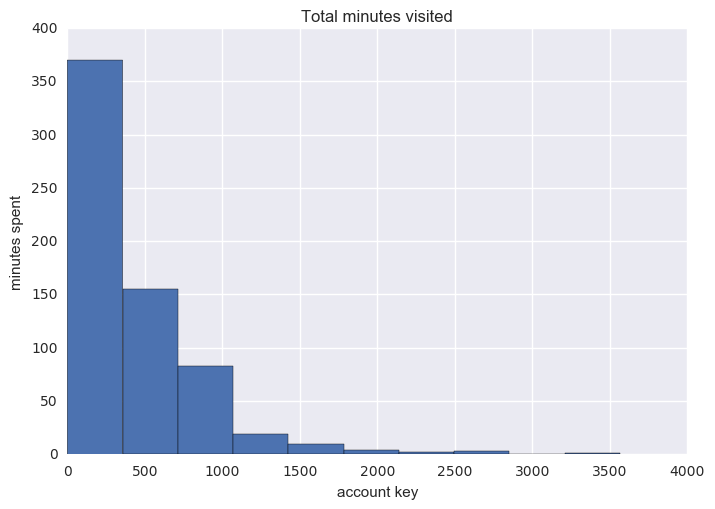

In [93]:
print('Average minutes spent in class for first week of students who pass first project:')
##Archtype function flow
#passing_engagement_by_account = group_data(passing_engagement,'account_key')
#passing_engagement_by_account = sum_grouped_items(passing_engagement_by_account, 'total_minutes_visited')
#passing_engagement_by_account = data_list(passing_engagement_by_account)
#describe_data(passing_engagement_by_account)
#print()

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

##Archetype as function
def get_metrics(data, fieldname, title, xlabel, ylabel):
    data_place_holder = group_data(data, 'account_key')
    data_place_holder = sum_grouped_items(data_place_holder, fieldname)
    data_place_holder = data_list(data_place_holder)
    describe_data(data_place_holder)
    plt.hist(data_place_holder)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    
get_metrics(passing_engagement, 'total_minutes_visited', 'Total minutes visited', 'account key', 'minutes spent')
print()
#get_metrics(non_passing_engagement, 'total_minutes_visited')
#print()
#get_metrics(passing_engagement, 'lessons_completed')
#print()
#get_metrics(non_passing_engagement, 'lessons_completed')
#get_metrics(passing_engagement, 'has_visited')
#get_metrics(non_passing_engagement, 'has_visited')


def get_histo(data, fieldname):
    data_place_holder = group_data(data, 'account_key')
    data_place_holder = sum_grouped_items(data_place_holder, fieldname)
    data_place_holder = data_list(data_place_holder)
    return data_place_holder

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).

## Making Histograms

In [86]:



#plt.hist(total_minutes_by_account)

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.

## Improving Plots and Sharing Findings

In [ ]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.